In [1]:
import pandas as pd
train = pd.read_csv('train_bk.csv') # 자전거 수요 예측 데이터
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [2]:
train['date'] = train['datetime'].apply(lambda x:x.split()[0])
train['year'] = train['datetime'].apply(lambda x:x.split('-')[0])
train['month'] = train['datetime'].apply(lambda x:x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x:x.split()[0].split('-')[2])


train['hour'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[2])

In [3]:
from datetime import datetime
import calendar

In [4]:
print(datetime.strptime(train['date'][10], '%Y-%m-%d'))

#월화수목금토일 정수로 변환
print(datetime.strptime(train['date'][10], '%Y-%m-%d').weekday())
print(calendar.day_name[datetime.strptime(train['date'][10], '%Y-%m-%d').weekday()])

2011-01-01 00:00:00
5
Saturday


In [5]:
train['weekday'] = train['date'].apply(lambda dateString:calendar.day_name[datetime.strptime(dateString,'%Y-%m-%d').weekday()])

In [6]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


In [8]:
train.groupby('weekday')['count'].mean()

weekday
Friday       197.844343
Monday       190.390716
Saturday     196.665404
Sunday       180.839772
Thursday     197.296201
Tuesday      189.723847
Wednesday    188.411348
Name: count, dtype: float64

In [9]:
train.groupby('season')['count'].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

In [10]:
train.groupby('weather')['count'].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

In [11]:
import seaborn as sns

C:\Users\onlyo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

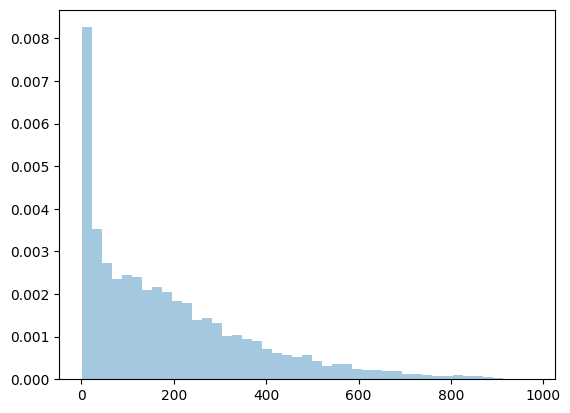

In [12]:
sns.distplot(train['count'])

<Axes: xlabel='weather', ylabel='count'>

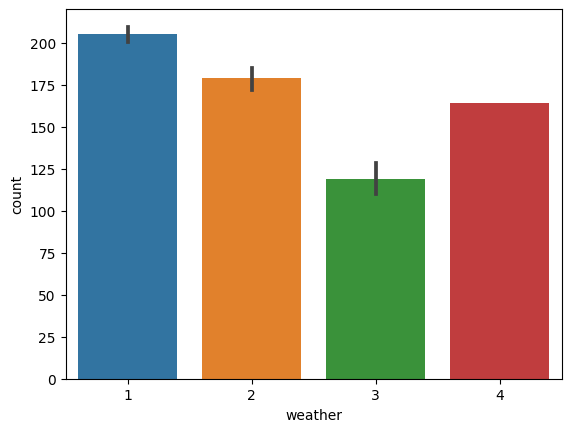

In [13]:
sns.barplot(x='weather', y='count', data=train)